# NRMA.py

In [1]:
%run -i 'NRMA.py' responses.csv

Average error of assignment for first rotation: 0.2608225108225108
Percent of students who recieved their first choice rotation: 0.7402597402597403


# Performance Analysis

## Introduction
Loading libraries and lodaing response/rotation data. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(11.7,
                                8.27)})
sns.set_theme(style = "white", 
              palette = 'gnuplot2')

In [3]:
responses = pd.read_csv("./responses.csv", encoding='cp1252')
responses.columns = ['studentID', 'program', 'residency','Option 1','Option 2','Option 3','Opiton 4']
responses = pd.melt(responses, 
                    id_vars=['studentID', 'program', 'residency'], 
                    var_name='option', 
                    value_name='beans')

n_students = max(responses.studentID)
responses

,studentID,program,residency,option,beans
0,1,College Program,INTM,Option 1,0
1,2,College Program,Plastic Surgery,Option 1,0
2,3,University Program,Neurology (incl Child Neuro),Option 1,0
3,4,University Program,Ophthalmology,Option 1,0
4,5,University Program,Urology,Option 1,0
...,...,...,...,...,...
303,73,University Program,Surgery (incl integrated Thoracic or Vasc Surg),Opiton 4,0
304,74,College Program,Med/Peds,Opiton 4,0
305,75,University Program,Orthopedics,Opiton 4,1
306,76,University Program,Orthopedics,Opiton 4,0


In [4]:
assignment = pd.read_csv("./out/rotations.csv").drop(['rotation_order'], axis = 1)
assignment.columns = ['studentID', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'optimal_rotation']

rotations = pd.merge(responses, assignment[['studentID', 'optimal_rotation']],  
                     how='left', 
                     left_on=['studentID'], right_on=['studentID'])
rotations

,studentID,program,residency,option,beans,optimal_rotation
0,1,College Program,INTM,Option 1,0,Option 4
1,2,College Program,Plastic Surgery,Option 1,0,Option 4
2,3,University Program,Neurology (incl Child Neuro),Option 1,0,Option 4
3,4,University Program,Ophthalmology,Option 1,0,Option 3
4,5,University Program,Urology,Option 1,0,Option 1
...,...,...,...,...,...,...
303,73,University Program,Surgery (incl integrated Thoracic or Vasc Surg),Opiton 4,0,Option 2
304,74,College Program,Med/Peds,Opiton 4,0,Option 3
305,75,University Program,Orthopedics,Opiton 4,1,Option 2
306,76,University Program,Orthopedics,Opiton 4,0,Option 3


## Data Analysis

### Bean Submission Statistics

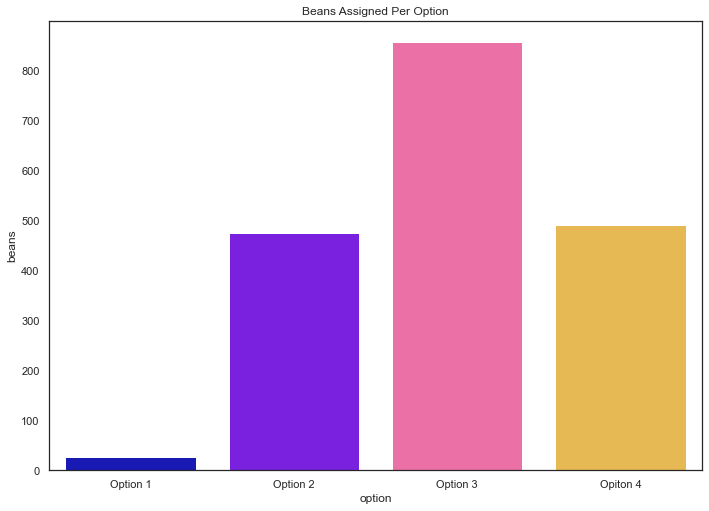

In [5]:
ax1 = sns.barplot(x = "option", y = "beans", 
                      data = responses, 
                      estimator = sum, ci = None, 
                      palette = 'gnuplot2').set_title("Beans Assigned Per Option")

In [6]:
print(f"Percent of students who committed all their beans to a single rotation:",
     sum(rotations.beans == 24)/max(rotations.studentID))

Percent of students who committed all their beans to a single rotation: 0.7142857142857143


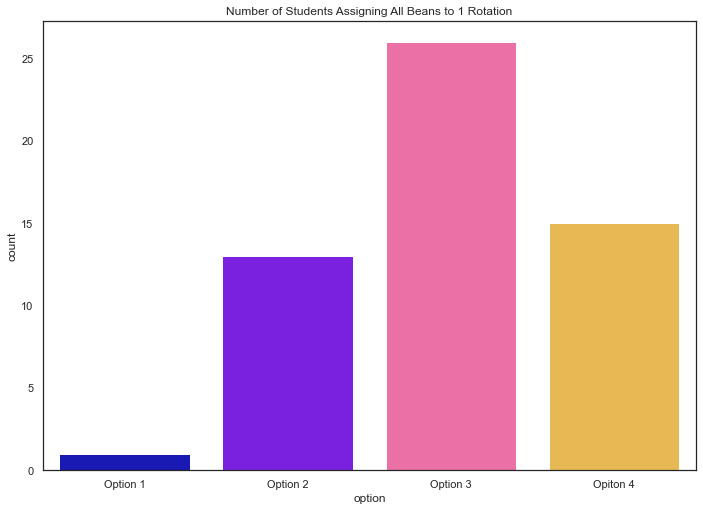

In [7]:
allbeans = rotations[rotations['beans'] == 24]
ax2 = sns.countplot(x = "option", 
                        data = allbeans,
                       palette = 'gnuplot2').set_title("Number of Students Assigning All Beans to 1 Rotation")

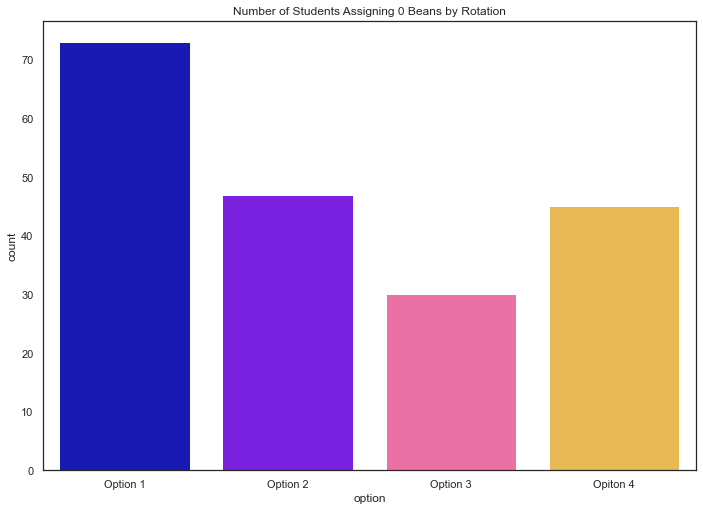

In [8]:
zerobeans = rotations[rotations['beans'] == 0]
ax3 = sns.countplot(x = "option", 
                        data = zerobeans,
                        palette = 'gnuplot2').set_title("Number of Students Assigning 0 Beans by Rotation")

In [9]:
def get_col(sr):
    name = sr.idxmin()
    value = sr[name]
    return pd.Series([value, name])

assignment[['noptimal_beans','noptimal_rotation']] = assignment[['Option 1', 'Option 2', 'Option 3', 'Option 4']].apply(lambda x : get_col(x), axis=1)
print(f"Percent of students who recieved their last choice rotation:",
      sum(assignment['optimal_rotation'] == assignment['noptimal_rotation'])/n_students)

Percent of students who recieved their last choice rotation: 0.19480519480519481


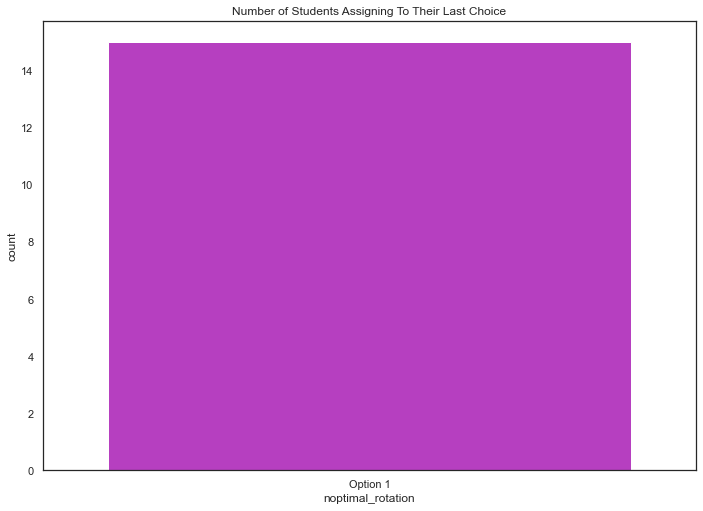

In [10]:
ax4 = sns.countplot(data = assignment[assignment.noptimal_rotation == assignment.optimal_rotation], 
                             x = 'noptimal_rotation',
                            palette = 'gnuplot2').set_title("Number of Students Assigning To Their Last Choice")

These data show the clear disdain students have for rotation option 1.

### Speciality of Interest

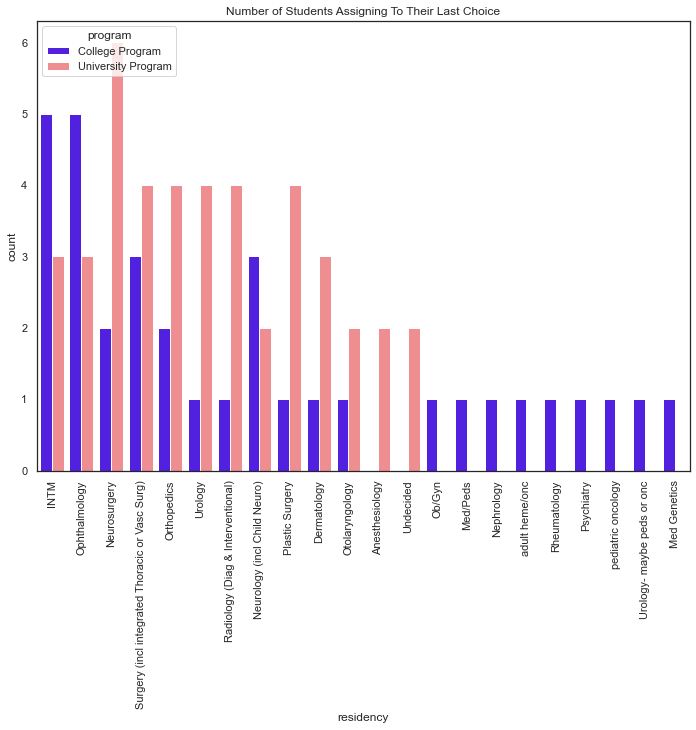

In [11]:
responses = pd.read_csv("./responses.csv", encoding='cp1252')
responses.columns = ['studentID', 'program', 'residency','Option 1','Option 2','Option 3','Opiton 4']

ax5 = sns.countplot(data = responses,
                   x = 'residency', hue = 'program',
                    order = responses['residency'].value_counts().index,
                   palette = 'gnuplot2').set_title("Number of Students Assigning To Their Last Choice")
supressor = plt.xticks(rotation = 90)

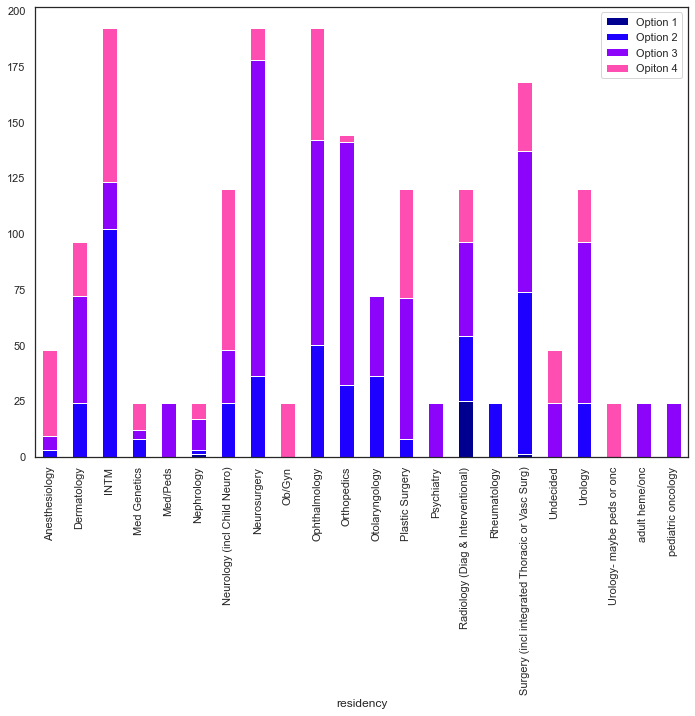

In [45]:
responses = pd.read_csv("./responses.csv", encoding='cp1252')
responses.columns = ['studentID', 'program', 'residency','Option 1','Option 2','Option 3','Opiton 4']
responses = responses[['residency','Option 1','Option 2','Option 3','Opiton 4']]
responses = responses.groupby(['residency']).sum()
responses
#ax6 = sns.barplot(data = responses,
#                   x = 'residency', y = 'beans', hue = 'option',
#                  estimator = sum, ci = None,
#                   palette = 'gnuplot2').set_title("Number of Students Assigning To Their Last Choice")

#supressor = plt.xticks(rotation = 90)
ax6 = responses.plot(kind = 'bar', stacked = True)